In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('train.csv', engine='python')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:xlabel='price_range', ylabel='ram'>

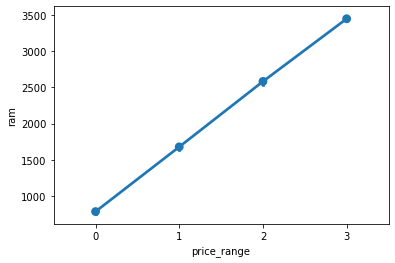

In [6]:
sns.pointplot(y='ram',x='price_range',data=df)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

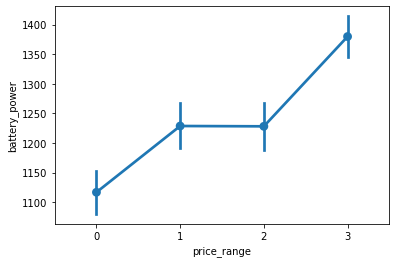

In [7]:
sns.pointplot(x='price_range',y='battery_power',data=df)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

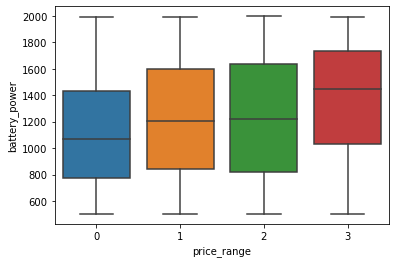

In [8]:
sns.boxplot(x='price_range',y='battery_power',data=df)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

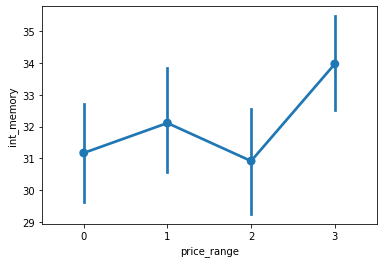

In [9]:
sns.pointplot(x='price_range',y='int_memory',data=df)

In [10]:
col = df.columns
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

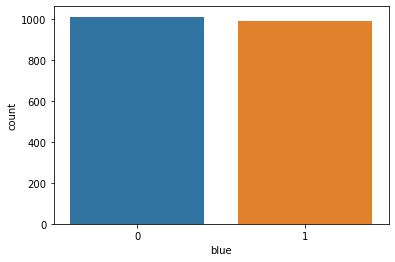

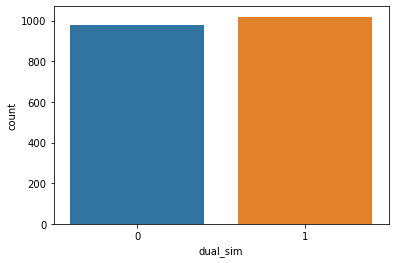

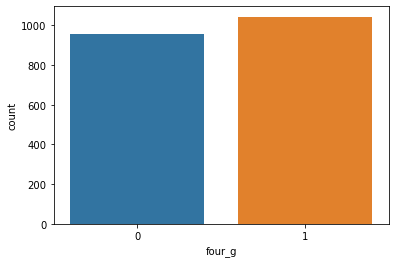

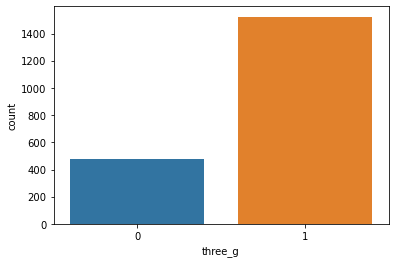

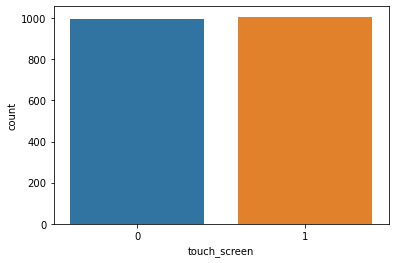

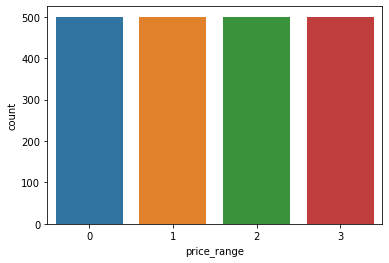

In [12]:
for i in categorical_col:
  sns.countplot(df[i])
  plt.xlabel(i)
  plt.show()

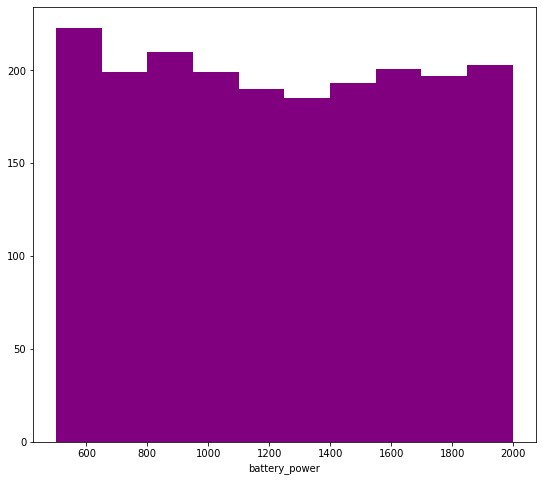

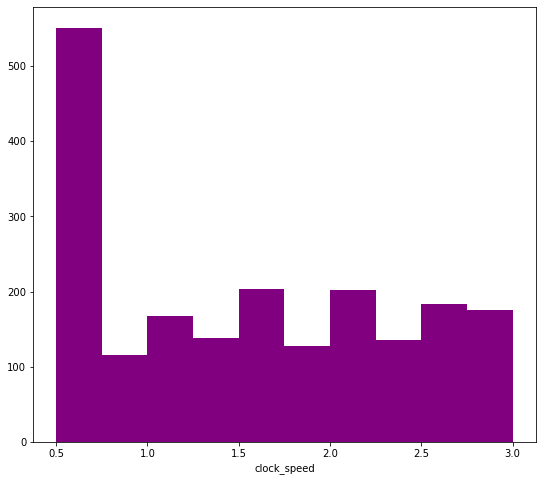

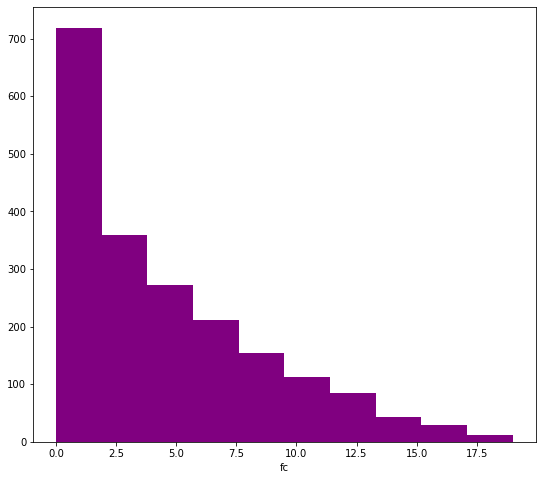

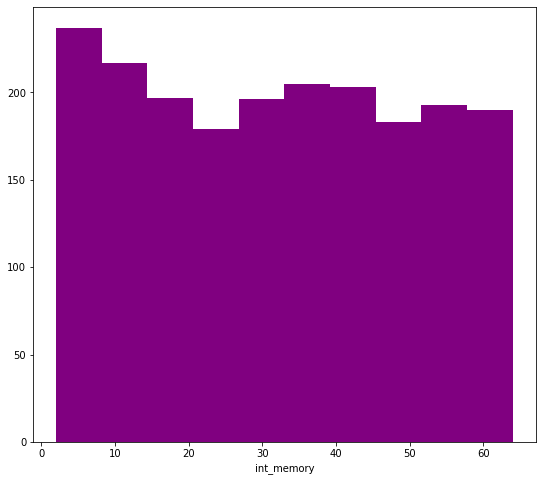

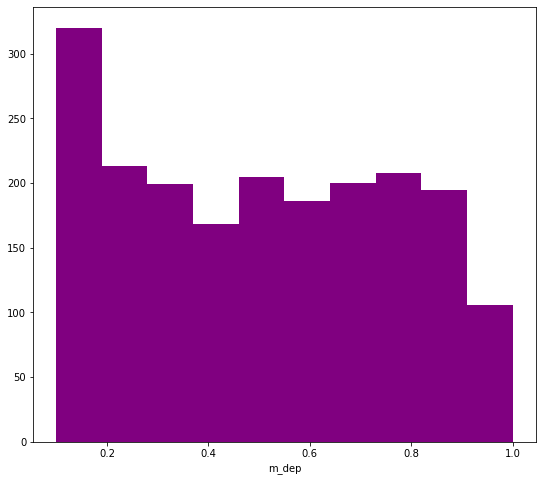

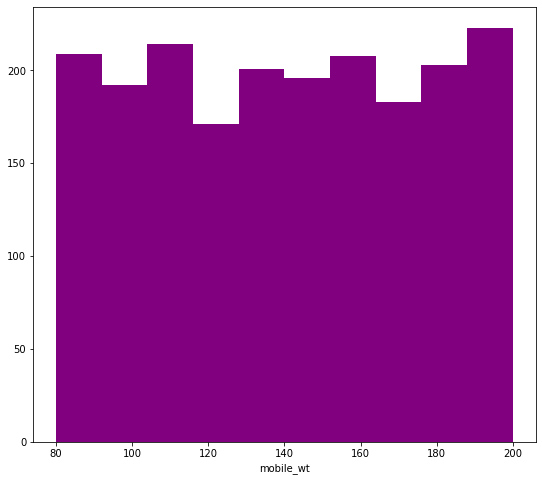

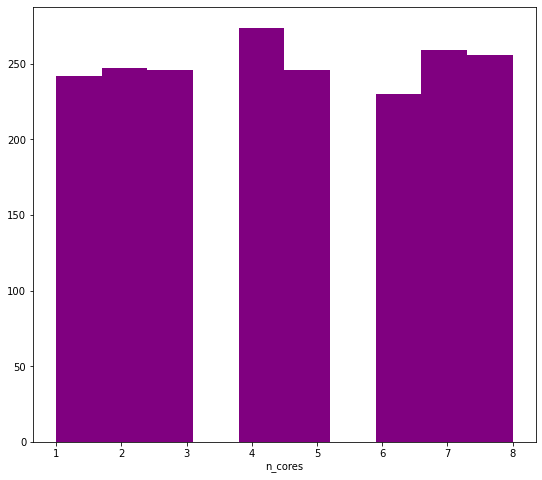

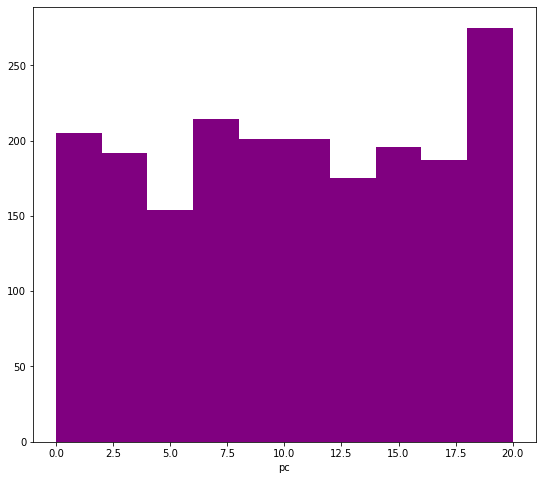

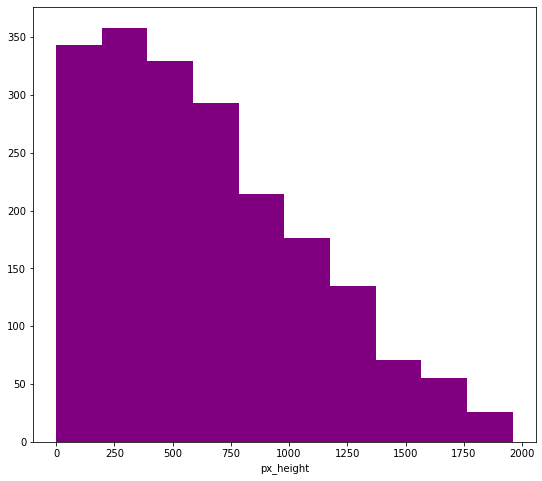

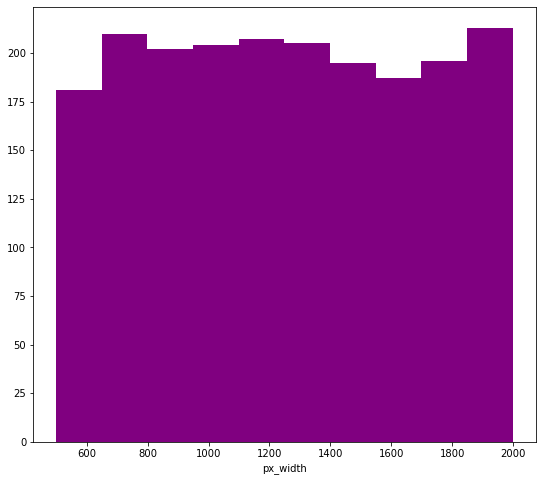

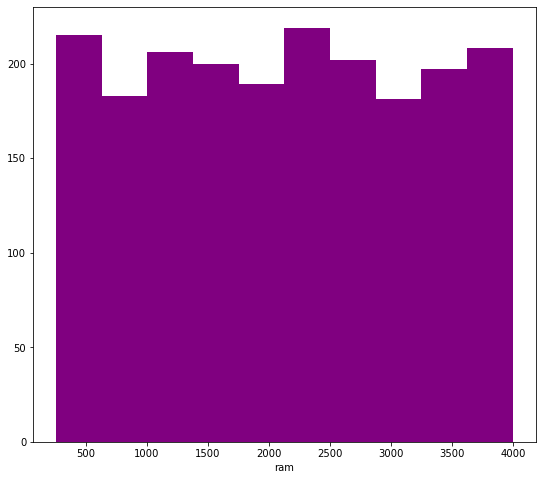

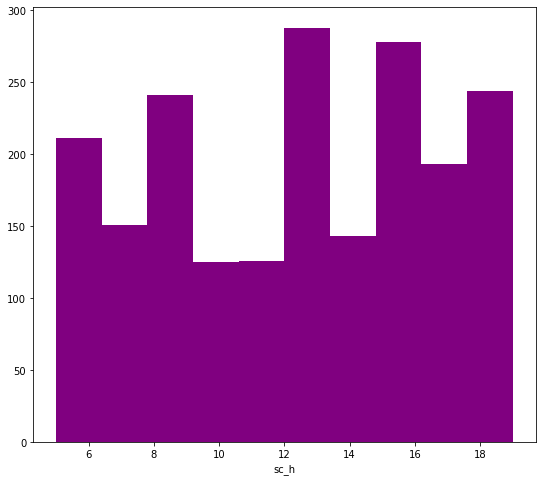

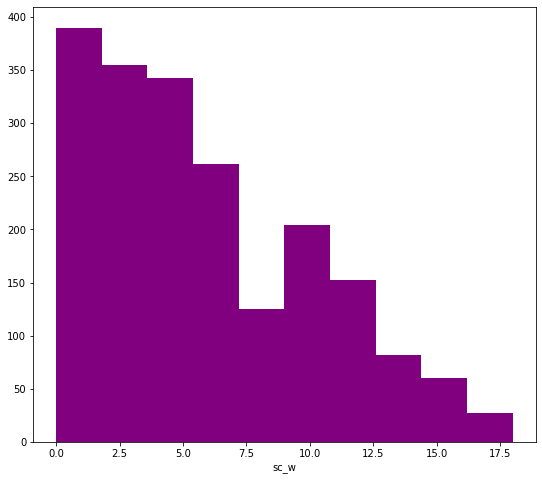

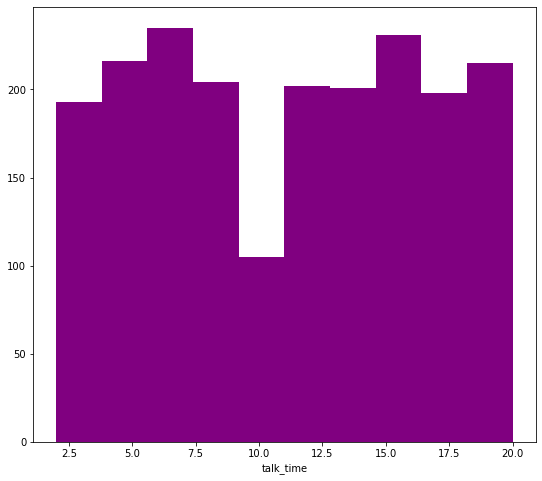

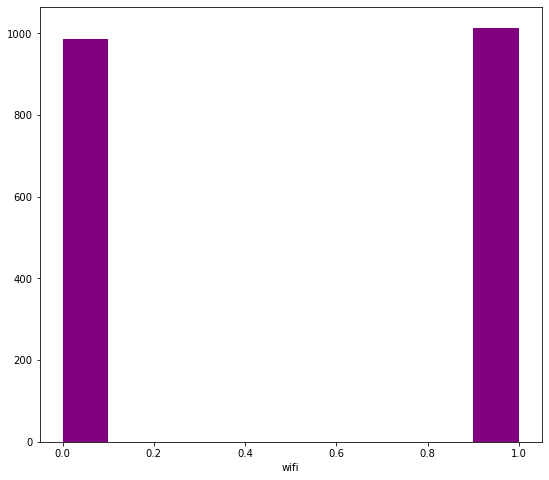

In [13]:
 for i in df.drop(df[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

Text(0.5, 1.0, 'Correlation ')

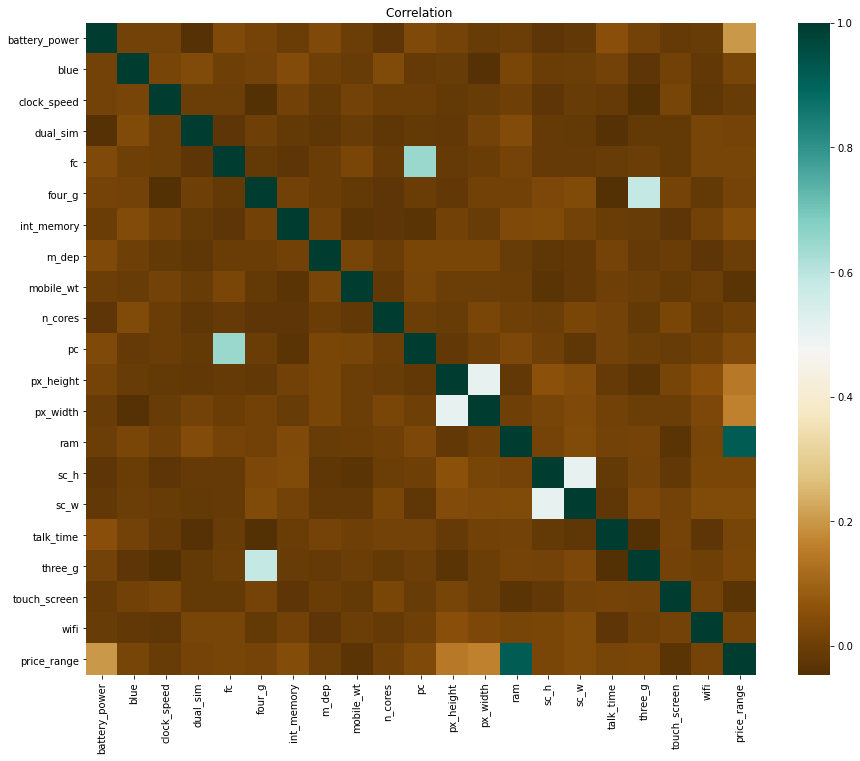

In [14]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")
#Checking the correlation by plotting correlation plot.

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

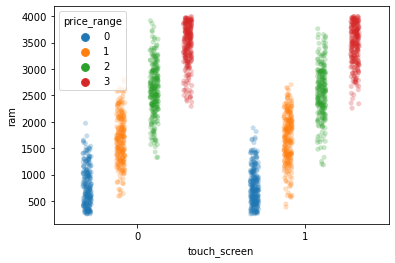

In [15]:
# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

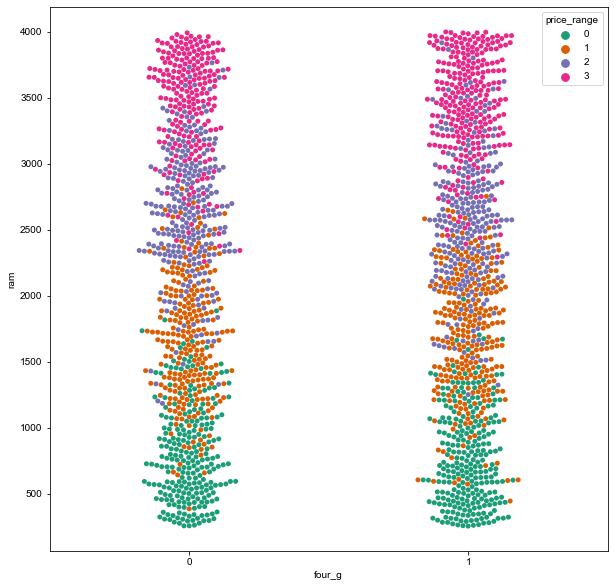

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

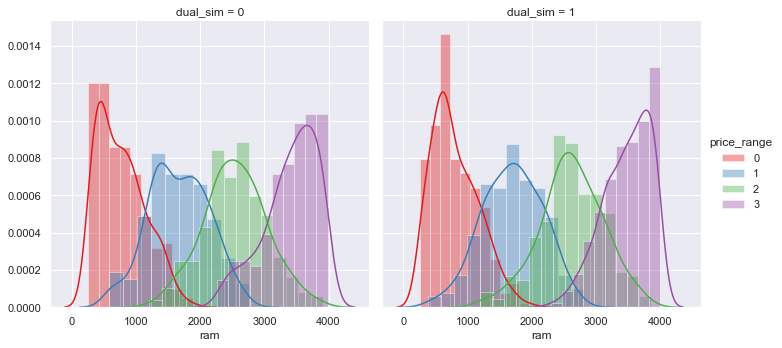

In [17]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5)
g = (g.map(sns.distplot, "ram").add_legend())

In [18]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [19]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.009945,battery_power
1,1.011342,blue
2,1.006025,clock_speed
3,1.011555,dual_sim
4,1.718987,fc
5,1.528509,four_g
6,1.009274,int_memory
7,1.006385,m_dep
8,1.004548,mobile_wt
9,1.008442,n_cores


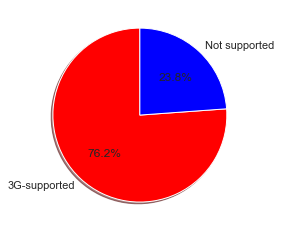

In [21]:
labels = ["3G-supported",'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

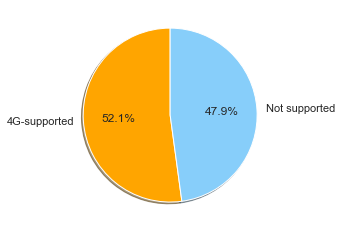

In [22]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

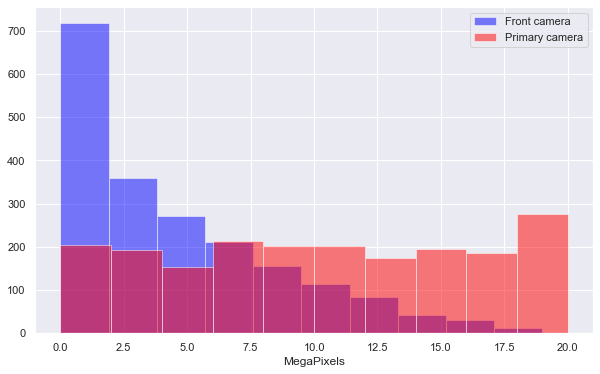

In [23]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [24]:
#model use now 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [26]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_test_pred2 = svc.predict(x_test)
y_train_pred2=svc.predict(x_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

In [27]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))

Train Set Accuracy:94.93333333333334


In [28]:
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))

Test Set Accuracy:94.0


In [29]:
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))


Confusion Matrix:
[[124   8   0   0]
 [  1 114   9   0]
 [  0   3 112   5]
 [  0   0   4 120]]


In [30]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       132
           1       0.91      0.92      0.92       124
           2       0.90      0.93      0.91       120
           3       0.96      0.97      0.96       124

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

